# Associazione tra Variabili e Dati Multivariati

Abbiamo finora analizzato dati "univariati", ovvero composte di una sola variabile. Più precisamente, anche quando diverse variabili erano disponibili, abbiamo analizzato le variabili ad una ad una. In pratica, capita spesso che le osservazioni sotto analisi siano costituite da più variabili. In questi casi è utile considerare dei metodi per descrivere e visualizzare i dati in maniera "multivariata", in modo da studiare le interazioni tra i vari fattori che descrivono il fenomeno in analisi. 

Utilizzeremo come esempio nuovamente il dataset Titanic:

In [23]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dato il dataset sopra, potremmo chiederci se delle variabili influenzano i valori di altre. Ad esempio, trovarsi in prima, seconda o terza classe (variabile `Pclass`) influenza in qualche modo la probabilità di sopravvivere (variabile `Survived`)?, o ancora, l'età (variabile `Age`) o il prezzo pagato (`Fare`) influenza in qualche modo la probabilità di salvarsi (`Survived`)?

In questa lezione, vedremo diversi modi per riassumere le distribuzioni di due variabili e verificare eventuali associazioni (o correlazioni) tra le variabili.

## Riassumere la Distribuzione di due Variabili Discrete

Se entrambe le variabili che stiamo studiando sono discrete, possiamo enumerare tutte le possibili combinazioni di valori e riassumerle in una tabella di contingenza che indica i valori di una variabile sulle righe e quelli dell'altra variabile sulle colonne. Ogni cella indicherà il numero di volte in cui osserviamo una data coppia di valori.

### Tabelle di Contingenza
Costruiamo la tabella di contingenza per le variabili `Sex` e `Pclass`. Per farlo utilizzeremo la funzione `crosstab` di Pandas:

In [29]:
pd.crosstab(titanic['Sex'], titanic['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


La tabella sopra indica ad esempio che $94$ passeggeri in classe $1$ erano di sesso femminile. Specificando `margins=True` possiamo ottenere le somme per righe e colonne, che indicheranno le frequenze assolute di ciascuna variabile:

In [30]:
pd.crosstab(titanic['Sex'], titanic['Pclass'],margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In generale, una tabella di contingenza è organizzata come segue:


|             | X=$x_1$        | X=$x_2$ | ... | X=$x_l$ | Total   |
|-------------|------------|------------|---------|-|-|
| Y=$y_1$     | $n_{11}$  | $n_{12}$  | ... | $n_{1l}$ | $n_{1+}$ |
| Y=$y_2$     | $n_{21}$  | $n_{22}$  | ... | $n_{2l}$ | $n_{2+}$ |
| ...     | ... | ... | ... | ...| ...| ...|
| Y=$y_k$     | $n_{k1}$  | $n_{k2}$  | ... | $n_{kl}$ | $n_{k+}$ |
| Total       | $n_{+1}$  | $n_{+2}$ | ... |  $n_{+l}$  | $n$ |

Dove: 
* $n_{ij}$ denota il numero di coppie di valori per cui $X=x_1$ e $Y=y_1$
* $n_{i+} = \sum_j n_{ij}$
* $n_{+j} = \sum_j n_{ij}$
* $n = \sum_i n_{i+} = \sum_j n_{+j} = \sum_{ij} n_ij$

### Distribuzioni di Frequenze Relative Congiunte

Così come nel caso dei campioni univariati, anche in questo caso possiamo ragionare in termini di frequenze relative. In particolare, possiamo definire le frequenze relative congiunte, dividendo ciascun elemento $n_{ij}$ per $n$:

$$f_{ij} = \frac{n_{ij}}{n}$$

Mettendo le frequenze relative in una tabella, otterremmo la seguente:

|             | X=$x_1$        | X=$x_2$ | ... | X=$x_l$|
|-------------|------------|------------|---------|-|
| Y=$y_1$     | $f_{11}$  | $f_{12}$  | ... | $f_{1l}$ |
| Y=$y_2$     | $f_{21}$  | $f_{22}$  | ... | $f_{2l}$ |
| ...     | ... | ... | ... | ...| ...|
| Y=$y_k$     | $f_{k1}$  | $f_{k2}$  | ... | $f_{kl}$ |


Possiamo ottenere la tabella delle frequenze relative congiunte passando `normalize=True` alla funzione crosstab:

In [33]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=True)

Pclass,1,2,3
Sex,,,
female,0.105499,0.085297,0.161616
male,0.136925,0.121212,0.389450


### Distribuzioni di Frequenze Relative Marginali

Possiamo riportare le somme per righe e colonne, ottenendo così le frequenze "marginali" (perché si scrivono a margine):

$$f_{i+} = \sum_j f_{ij} $$
$$f_{j+} = \sum_i f_{ij} $$

Mettendo tutto in una tabella:

|             | X=$x_1$        | X=$x_2$ | ... | X=$x_l$ | Total   |
|-------------|------------|------------|---------|-|-|
| Y=$y_1$     | $f_{11}$  | $f_{12}$  | ... | $f_{1l}$ | $f_{1+}$ |
| Y=$y_2$     | $f_{21}$  | $f_{22}$  | ... | $f_{2l}$ | $f_{2+}$ |
| ...     | ... | ... | ... | ...| ...| ...|
| Y=$y_k$     | $f_{k1}$  | $f_{k2}$  | ... | $f_{kl}$ | $f_{k+}$ |
| Total       | $f_{+1}$  | $f_{+2}$ | ... |  $f_{+l}$  | $n$ |

Possiamo ottenre questa tabella come segue:

In [35]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=True, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.105499,0.085297,0.161616,0.352413
male,0.136925,0.121212,0.389450,0.647587
All,0.242424,0.206510,0.551066,1.000000


Va notato che le frequenze relative marginali ottenute, sono identiche alle frequenze relative dei campioni univariati:

In [37]:
titanic['Sex'].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

Che sono esattamente i valori nell'ultima colonna della tabella precedente. Analogamente:

In [38]:
titanic['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

Che sono i valori nell'ultima riga della tabella precedente.

### Distribuzioni di Frequenze Relative Condizionali

In certi casi, è utile calcolare le frequenze dei valori di una variabile nel caso in cui i valori di un'altra variabile sono tenuti costanti. Queste frequenze ci permettono di rispondere a domande del tipo:
* Qual è la distribuzione delle classi tra gli uomini?
* Qual è la distribuzione delle classi tra le donne?
* Qual è la distribuzione dei sessi in prima classe?
* Qual è la distribuzione dei sessi in seconda classe?
* Qual è la distribuzione dei sessi in terza classe?

Le frequenze condizionate sono definite come segue:

$$ f_{i|j}^{X|Y} = f(X=x_i|Y=y_j) = \frac{n_{ij}}{n_{+j}} $$
$$ f_{j|i}^{Y|X} = f(Y=y_j|X=x_i) = \frac{n_{ij}}{n_{i+}} $$

In pratica, se si condiziona rispetto a un valore $Y=y_j$ si deve dividere il numero di occorrenze delle coppie per il numero di volte in cui si verifica $Y=y_j$.

In pratica, è possibile ottenere le frequenze condizionate relative normalizzando per la riga opportuna. Se voglio condizionare rispetto alla variabile X, normalizzerò per righe:

In [45]:
#normalize=0 indica di condizionare rispetto alla prima variabile
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=0)

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


Dalla tabella sopra, ad esempio, posso evincere:

* $f(Pclass=1|Sex=female) = 0.290363$
* $f(Pclass=2|Sex=female) = 0.242038$
* $f(Pclass=3|Sex=female) = 0.458599$

Queste sono le frequenze delle donne nelle tre classi. Analogamente, la seconda riga rappresenta le frequenze condizionate rispetto a `Sex=male`. Dalla tabella, notiamo che la distribuzione dei passeggeri cambia nelle tre classi. In particolare, tra gli uomini, la terza classe è più frequente che tra le donne. 

Possiamo ottenere la prospettiva complementare condizionando su classe invece:

In [49]:
#normalize=1 indica di condizionare rispetto alla prima variabile
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=1)

Pclass,1,2,3
Sex,,,
female,0.435185,0.413043,0.293279
male,0.564815,0.586957,0.706721


In questo caso, ogni colonna sarà una distribuzione di probabilità. Ad esempio:

* $P(Sex=female|Pclass=1) = 0.435185$
* $P(Sex=male|Pclass=1) = 0.564815$

Notiamo che le proporzione tra uomini e donne cambiano nelle tre classi e in particolare nella terza classe ci sono molti più uomini che donne.

### Rappresentazioni Grafiche
Possiamo facilmente ottenere rappresentazioni grafiche delle relazioni tra due variabili mediante grafici a barre, direttamente dalle tabelle di contingenza.

Possiamo confrontare le frequenze assolute di passeggeri e sessi nelle tre classi come segue:

<Axes: xlabel='Sex'>

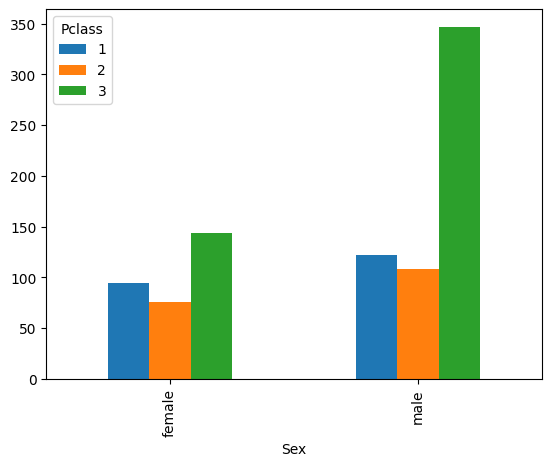

In [58]:
pd.crosstab(titanic['Sex'], titanic['Pclass']).plot.bar()

Da qui notiamo che molti passeggeri sono uomini e in terza classe. In questi casi, può essere a volte utile uno stacked plot:

<Axes: xlabel='Sex'>

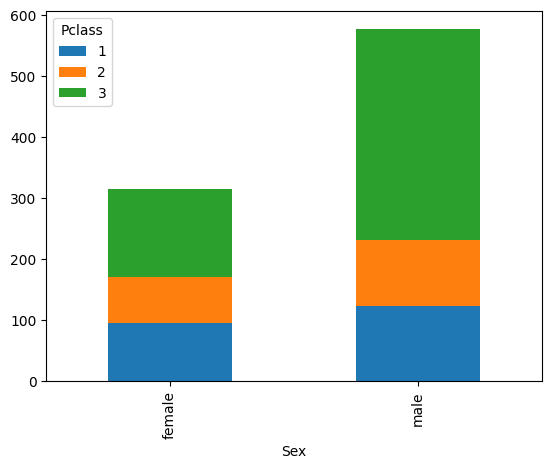

In [59]:
pd.crosstab(titanic['Sex'], titanic['Pclass']).plot.bar(stacked=True)

È spesso utile visualizzare le distribuzioni condizionate. Ad esempio, il grafico che segue ci permette di confrontare le distribuzioni di passeggeri nelle tre classi, suddividendo in due gruppi sulla base del sesso:

<Axes: xlabel='Sex'>

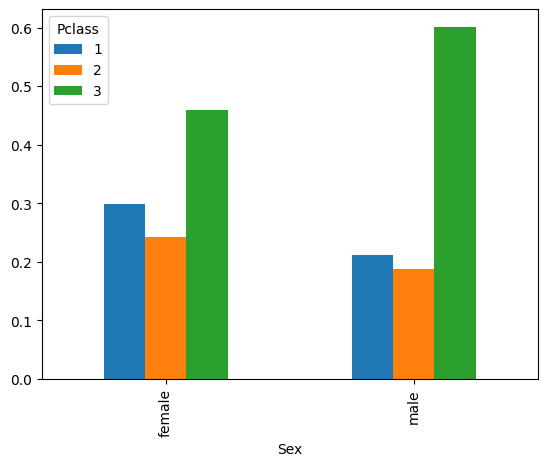

In [62]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=0).plot.bar()

Possiamo ottenere il grafico delle frequenze condizionate rispetto alle classi per una vista complementare. In questo caso, per avere un grafico significativo, dobbiamo trasporre la tabella di contingenza con un `.T`:

<Axes: xlabel='Pclass'>

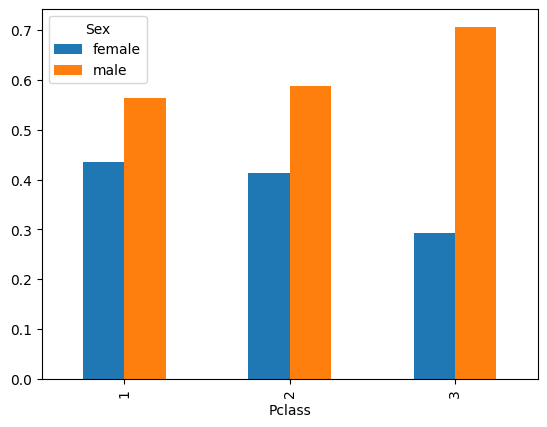

In [63]:
#normalize=1 indica di condizionare rispetto alla prima variabile
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=1).T.plot.bar()

### Misure di Associazione tra due Variabili Discrete

Vediamo adesso delle misure che ci permettono di stimare se due variabili sono o meno "associate", ovvero fino a che punto i valori di una variabile influenzano quelli dell'altra. Abbiamo visto che le variabili `Sex` e `Pclass` sembrano avere un qualche grado di associazione. Vediamo adesso un caso di associazione più forte, esplorando la relazione tra `Pclass` e `Survived`:

In [78]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize=0)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


La tabella mostra tre distribuzioni di frequenze relative di `Survived` condizionando rispetto ai valori `Pclass`:
* f(Survived|Pclass=1)
* f(Survived|Pclass=2)
* f(Survived|Pclass=3)

Dai numeri vediamo che le distribuzioni sono molto diverse, a seconda del condizionamento operato. Ciò non è soprendente, perché immaginiamo che i passeggeri in prima e seconda classe abbiano avuto un trattamento diverso rispetto a quelli in terza classe.

Visualizziamo le distribuzioni graficamente:

<Axes: xlabel='Pclass'>

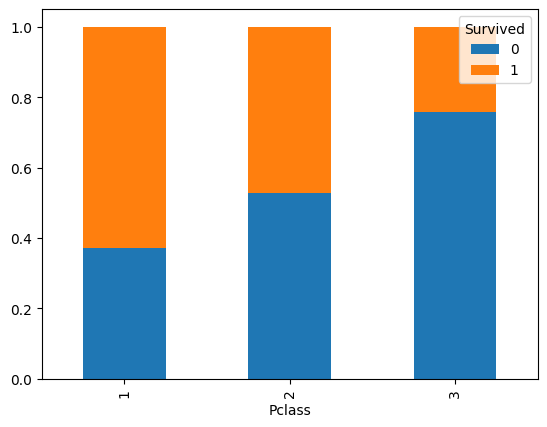

In [81]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize=0).plot.bar(stacked=True)

Il grafico mostra chiaramente lo sbilanciamento, per cui deduciamo che `Pclass` e `Survived` sono in effetti associate (o correlate).

Calcoliamo le frequenze relative marginali, indipendentemente dalle classi:

In [131]:
titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Queste sono le frequenze $f(Survived=0)$ e $f(Survived=1)$.

Se le due variabili non fossero correlate, ci aspetteremmo di avere delle frequenze assolute proporzionali alle frequenze relative marginali:

$$\tilde{n}_{ij} = f_{ij} \cdot n_{i+}$$

Ovvero:

In [175]:
f_ij = titanic['Survived'].value_counts(normalize=True).values
n_iplus = titanic['Pclass'].value_counts().sort_index().values.reshape(-1,1)

f_ij*n_iplus

array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]])

Confrontiamo queste con le frequenze effettive:

In [176]:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


#### Statistica $\mathcal{X}^2$ di Pearson
La statistica $\mathcal{X}^2$ di Pearson misura questa differenza con la seguente formula:

$$\mathcal{X}^2 = \sum_{i=1}^k \sum_{j=1}^l \frac{(n_{ij}-\tilde{n}_{ij})^2}{\tilde{n}_{ij}}

Nel caso precedente, il risultato sarà:

In [179]:
n_ij_pred = f_ij*n_iplus
n_ij = pd.crosstab(titanic['Pclass'], titanic['Survived']).values

chi_square = ((n_ij-n_ij_pred)**2/n_ij_pred).sum()
chi_square

102.88898875696056

#### Statistica $V$ di Cramer
La statistica $\mathcal{X}^2$ di Pearson non è normalizzata, nel senso che il suo valore massimo dipende dalla dimensione del campione. Per ovviare a questo problema, si può usare la statistica V di Cramer, definita come segue:

$$V = \sqrt{\frac{\mathcal{X}^2}{n(min(k,l)-1)}}

È possibile calcolare la statistica V di Cramer come segue:

In [181]:
from scipy.stats.contingency import association

association(pd.crosstab(titanic['Pclass'], titanic['Survived']))

0.33981738800531175

#### Rischio Relativo e Odds Ratio

Il rischio relativo e l'odds ratio sono dei metodi di misurazione del grado di correlazione tra due variabili discrete, tra i più diffusi in epidemiologia. Consideriamo ad esempio la seguente matrice di contingenza che mette in relazione la variabile "Diseased/Healthy" con quella "Exposed/Non Exposed":

In [216]:
contingency = pd.DataFrame({
    "Smoking": [34, 22],
    "Non Smoking": [66,118]
}, index=["Disease", "Non Disease"])
contingency

,Smoking,Non Smoking
Disease,34,66
Non Disease,22,118


Consideriamo le distribuzioni condizionali delle frequenze relative:

<table>
<tr>
<td> f(Disease|Smoking)  </td><td>    f(Disease|Non Smoking)</td>
</tr>
<tr>
<td> f(Non Disease|Smoking)  </td><td>    f(Non Disease|Non Smoking)</td>
</tr>
</table>

Possiamo ottenere la tabella normalizzando per righe:

In [217]:
frequencies=contingency/contingency.sum(0)
frequencies

,Smoking,Non Smoking
Disease,0.607143,0.358696
Non Disease,0.392857,0.641304


Definiamo il **rischio relativo** come il rapporto tra le due distribuzioni di frequenze relative. Avremo dunque due valori di rischio relativo:

$$\frac{f(Disease|Smoking)}{f(Disease|Non\ Smoking)}; \frac{f(Non\ Disease|Smoking)}{f(Non\ Disease|Non\ Smoking)}$$

Per ottenere i due rischi relativi, è sufficiente dividere la prima colonna per la seconda:

In [220]:
relative_risks = frequencies['Smoking']/frequencies['Non Smoking']
relative_risks

Disease        1.692641
Non Disease    0.612591
dtype: float64

Il risultato sopra può essere interpretato così:
* La proporzione di individui malati è $1.69$ volte superiore nei fumatori, se comparati ai non fumatori. Ad esempio, se tra $100$ individui non fumatori ci sono 3 malati, mi aspetto di vederne $3\cdot 1.69 \approx 5$ tra $100$ individui fumatori.
* La proporzione di individui sani è $0.61$ volte più piccola nei fumatori, se comparati ai non fumatori. Ad esempio, se tra $100$ individui non fumatori ci sono $97$ individui sani, mi aspetto di vederne $97\cdot 0.61 \approx 60$ tra $100$ fumatori.

L'odds ratio viene definito come rapporto tra i rischi relativi:

$$OR = \frac{\frac{f(Disease|Smoking)}{f(Disease|Non\ Smoking)}}{\frac{f(Non\ Disease|Smoking)}{f(Non\ Disease|Non\ Smoking)}}$$

Calcoliamo il rischio relativo dividendo i due numeri:

In [222]:
relative_risks.iloc[0]/relative_risks.iloc[1] 

2.7630853994490354

Possiamo interpretare il valore ottenuto come segue:

> Le probabilità di essere malati sono superiori di $2.76$ volte nei fumatori rispetto che nei non fumatori.

O alternativamente:

> Le probabilità di essere un fumatore sono superiori di $2.76$ volte nei soggetti malati rispetto che nei soggetti sani.

## Associazioni tra Variabili Ordinali e Continue

Considereremo il dataset delle iris di fisher come dataset di esempio. Carichiamo il dataset mediante la libreria `seaborn` e visualizziamone informazioni e prime righe:

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Il dataset contiene $150$ osservazioni riportanti le misure di 4 grandezze (lunghezza e larghezza di sepalo e petalo) per $150$ esemplari di iris appartenenti a tre specie diverse: Iris setosa, Iris virginica e Iris versicolor. 

Tutte le variabili sono numeriche, eccetto `species` che è categorica. Visualizziamone i valori univoci:

In [4]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Esploriamo i dati calcolando i principali indicatori statistici mediante `describe`:

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


> **🙋‍♂️ Domanda 1**
>
> La variabile `species` non è stata inclusa nel sommario. Perché?

Confrontiamo le diverse variabili mediante boxplot:

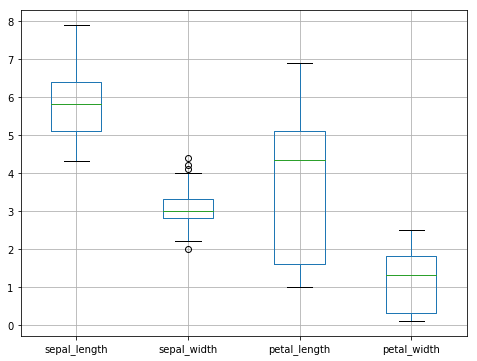

In [47]:
iris.plot.box(figsize=(8,6))
plt.grid()
plt.show()

## Scatter Plot

Il plot sopra ci permette di studiare alcune caratteristiche delle variabili. Tuttavia esso tratta i dati come $4$ campioni univariati indipendenti e dunque non mette in evidenza le eventuali relazioni che sussistono tra le variabili. Se consideriamo i dati in maniera univariata, possiamo considerare ognuna delle osservazioni come un punto che vive in uno spazio a $4$ dimensioni. In principio, sarebbe interessante studiare come tali dati si distribuiscono nello spazio, ma in pratica possiamo visualizzare al massimo punti dello spazio tridimensionale. Inoltre, i plot 3D sono in genere meno leggibili dei plot 2D. 

Un primo modo per visualizzare i dati, consiste dunque nello scegliere una coppia di variabili e plottare le osservazioni come se fossero punti in uno spazio 2D. Questo tipo di grafico si chiama **scatter plot**. Scegliamo ad esempio `sepal_width` e `petal_width` e visualizziamone lo scatter plot mediante la libreria `seaborn`:

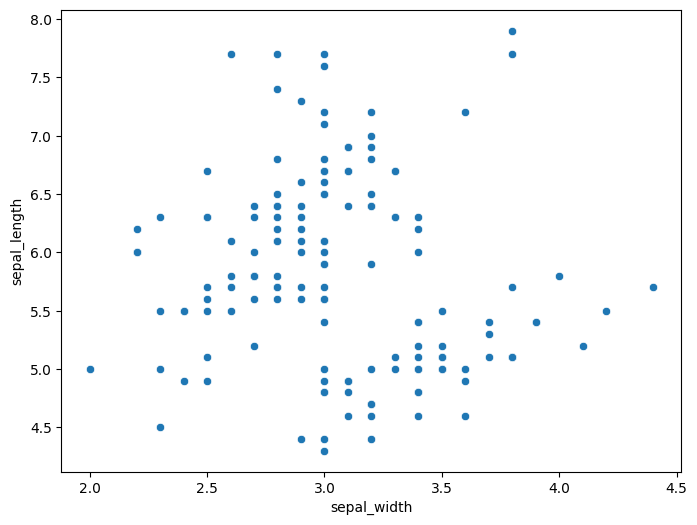

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris['sepal_width'], y=iris['sepal_length'])
plt.show()

Possiamo colorare i punti in maniera diversa a seconda dell'appartenenza alle diverse classi di iris utilizzando il parametro `hue`:

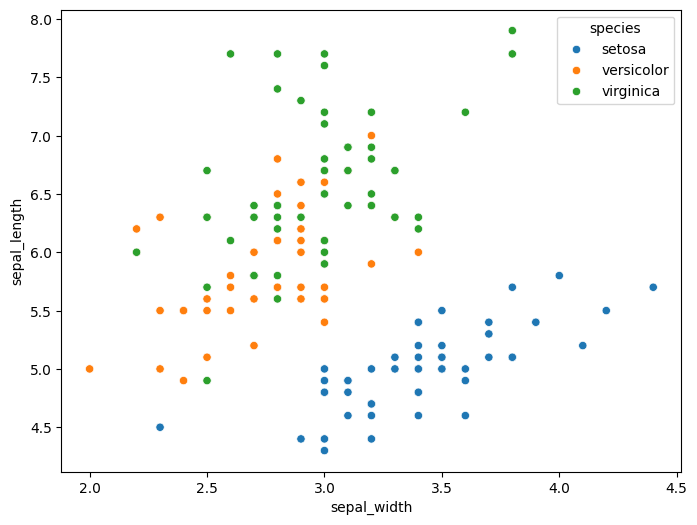

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris['sepal_width'], y=iris['sepal_length'], hue=iris['species'])
plt.show()

> **🙋‍♂️ Domanda 2**
> 
> Cosa apprendiamo dal plot? La coppia di variabili considerata costituisce un fattore discriminante per l'appartenenza alle diverse classi?

Lo scatterplot può essere effettuato con diverse coppie di variabili. Consideriamo la coppia (`sepal_length`, `petal_length`):

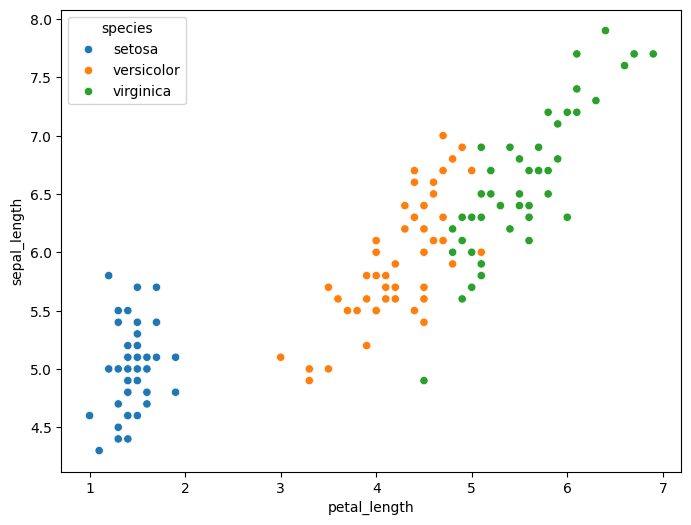

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris['petal_length'], y=iris['sepal_length'], hue=iris['species'])
plt.show()

> **🙋‍♂️ Domanda 3**
> 
> Si confronti l'ultimo scatterplot visualizzato con lo scatterplot visto in precedenza. La nuova coppia di variabili costituisce un fattore discriminante per l'appartenenza alle diverse classi?

Come possiamo notare dai due plot, ogni coppia di variabili ci permette di vedere "una parte" delle possibili interazioni tra le diverse variabili. Per avere un quadro più completo, in pratica si visualizzano gli scatter plot di tutte le coppie possibili. Questo plot prende il nome di scatter matrix. Possiamo ottenere una scatter matrix con `seaborn` come segue:

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


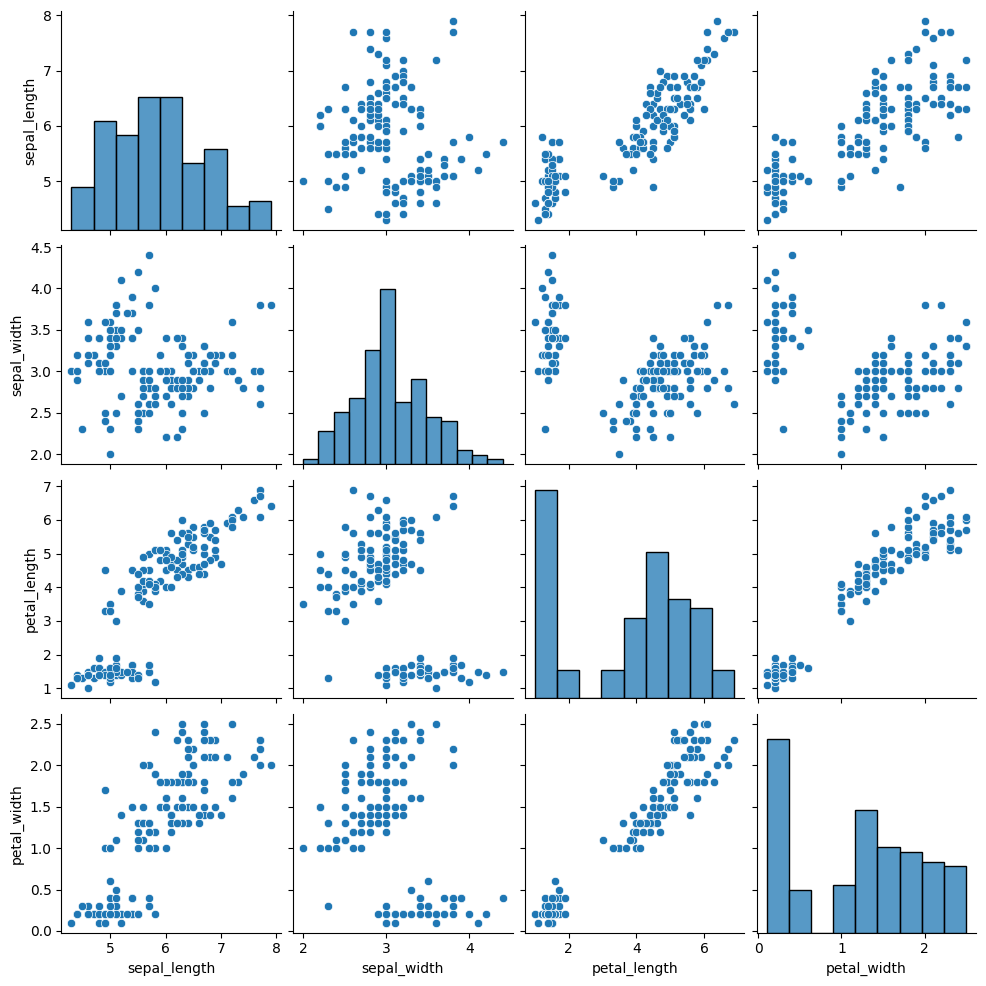

In [13]:
sns.pairplot(iris)
plt.show()

> **🙋‍♂️ Domanda 4**
> 
> Perché sulla diagonale principale vengono mostrati degli istogrammi al posto di scatter plot? Si mostrino gli scatterplot corrispondenti alle coppie di variabili sulla diagonale principale.

Possiamo evidenziare i punti per classe specificando una variabile sulla base della quale colorare i punti:

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


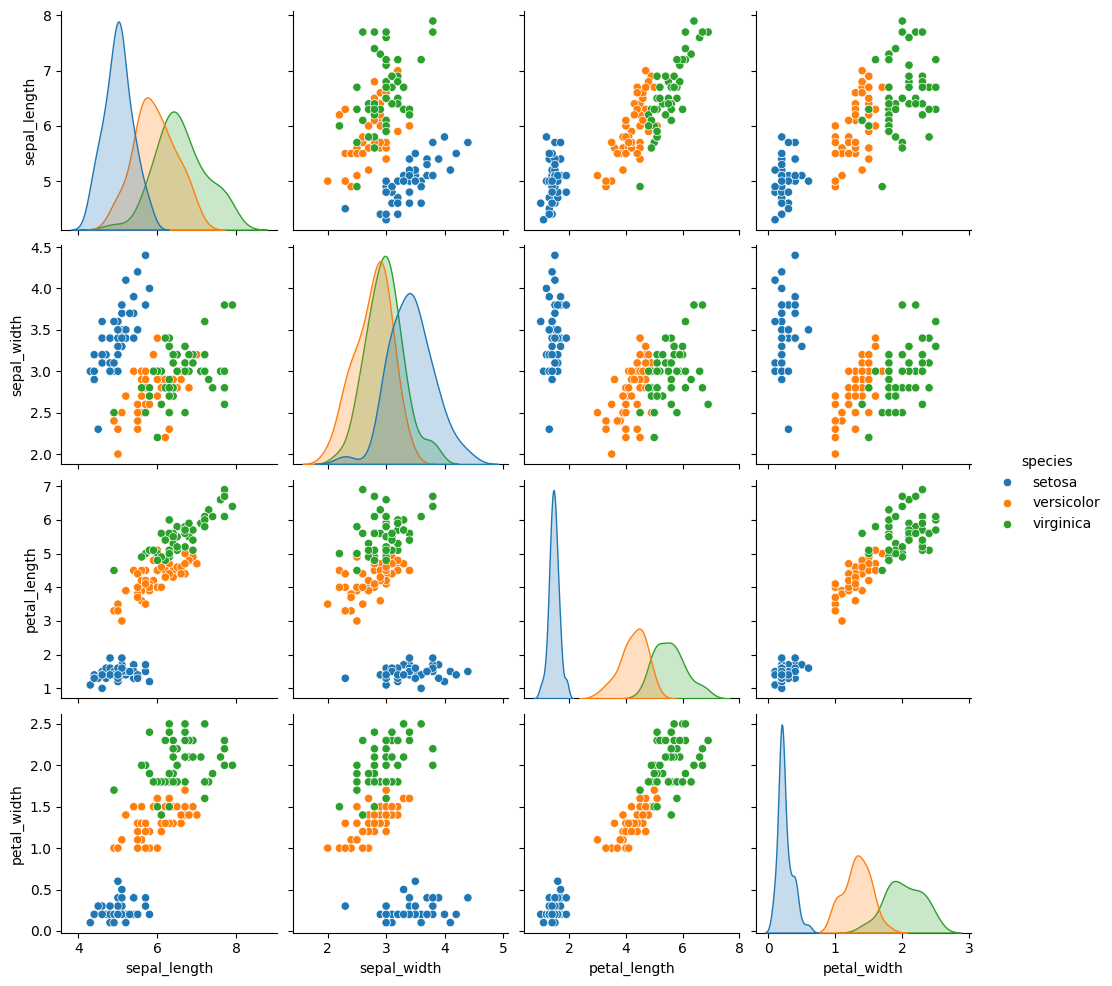

In [14]:
sns.pairplot(iris, hue='species')
plt.show()

> **🙋‍♂️ Domanda 5**
> 
> Esiste una coppia di variabili che individua uno spazio nel quale le osservazioni appartenenti alle diverse classi sono maggiormente distinte? Esiste una unica variabile che presenta distribuzioni particolarmente diverse a seconda dell'appartenenza alle tre classi?

## Medie e Covarianze

Nel caso **multivariato**, la **media** viene calcolata in maniera del tutto analoga al caso **univariato** come **media di vettori**. Possiamo banalmente calcolare la media dei nostri dati multivariati mediante il metodo `mean`:

In [53]:
print(iris.mean()) 

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64


Il risultato sarà un vettore (una serie di Pandas) che individua un punto nello spazio a quattro dimensioni che rappresenta la media delle osservazioni. Vediamo un semplice esempio a due dimensioni, considerando solo alcune variabili:

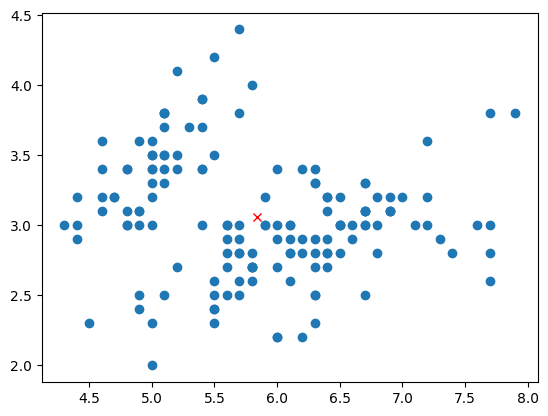

In [18]:
iris2d = iris[['sepal_length','sepal_width']]
mean_point = iris2d.mean()
plt.scatter(iris2d['sepal_length'],iris2d['sepal_width'])
plt.plot(mean_point.iloc[0], mean_point.iloc[1],'rx')
plt.show()

La croce rossa rappresenta il punto medio del dataset bidimensionale considerato.

Il concetto di **varianza** viene generalizzato dal concetto di **covarianza** nel caso di dati bivariati. La covarianza misura quanto i valori assunti dalle due variabili cambino assieme e si misura come segue:

\begin{equation}
\sigma_{XY} = \frac{1}{N}\sum_i^N (x_i - \overline x) (y_i - \overline y)
\end{equation}

dove $X$ e $Y$ sono le due variabili di interesse, $x_i$ è il valore di $X$ per l'iesima osservazione, $y_i$ è il valore di $Y$ per l'iesima osservazione e $\overline x$, $\overline y$ sono le medie delle osservazioni per le due variabili $X$ e $Y$.

Intuitivamente, la covarianza assumerà valori molto positivi quando $X$ e $Y$ variano in maniera concorde (ovvero, se $X$ assume valori alti, $Y$ assume valori alti e se $X$ assume valori bassi $Y$ assume valori bassi). In tal caso infatti i segni dei due fattori all'interno della sommatoria saranno concordi e il loro prodotto avrà segno positivo. Se invece $X$ e $Y$ variano in maniera discorde, il prodotto avrà segno negativo e la varianza assumerà valori negativi.

> **🙋‍♂️ Domanda 6**
> 
> A cosa corrisponde la varianza se $X=Y$?

In pratica, in presenza di più variabili, si calcolano le covarianze di tutte le coppie possibili di variabili, un po' come visto nel caso della scatter matrix. Ciò si ottiene mediante il metodo `cov`:

In [20]:
iris.drop("species", axis=1).cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


> **🙋‍♂️ Domanda 7**
> 
> A cosa serve il codice `drop("species", axis=1)` inserito sopra?
> 
> Che cosa rappresentano i valori sulla diagonale principale?

> **🙋‍♂️ Domanda 8**
> 
> Ci sono coppie di variabili che presentano covarianze fortemente positive? Si confrontino i valori della matrice di covarianza con i relativi plot dello scatterplot. I due indicatori ci dicono la stessa cosa?

# Esercizi

> 🧑‍💻 Esercizio 1
> 
> Considerando il dataset Titanic, si calcolino per ogni variabile la numerosità, la media, la deviazione standard, il minimo, il massimo, il valore mediano, il primo e il terzo quartile. Dopo aver calcolato i valori richiesti individualmente, si utilizzi il metodo `describe` per ottenere tali valori. Qual è la variabile più dispersa?

> 🧑‍💻 Esercizio 2
> 
> Considerando il dataset Titanic, per ognuna delle tre classi, si calcolino medie e varianze delle età dei passeggeri. In quale classe le età sono meno disperse? Quale classe contiene i soggetti più giovani? Si completi l'analisi con dei grafici a barre.

> 🧑‍💻 Esercizio 3
> 
> Si aggiunga al dataset Titanic una nuova colonna "Old" che assume valore pari a 1 per le osservazioni che presentano età superiore al valore medio e 0 altrimenti. Si calcoli dunque una crosstab che calcoli il numero di soggetti "anziani" (soggetti per i quali old è pari a 1) rispetto alle variabili Pclass e Sex. Si mostri un barplot a partire dalla tabella. In quale classe gli uomini tendono ad essere molto più anziani delle donne?

> 🧑‍💻 Esercizio 4
> 
> Si carichi il dataset mpg mediante la libreria seaborn (usare l'istruzione `t=sns.load_dataset('mpg')`). Si visualizzi la scatter matrix differenziando i colori dei punti a seconda dei valori della variabile `origin`. Chi produce le macchine più pesanti? Esistono coppie di variabili che costituiscono un fattore decisivo per distinguere una delle origini dalle altre?

> 🧑‍💻 Esercizio 5
> 
> Considerando il dataset `mpg`, si scelga un gruppo di variabili rispetto alle quali ottenere un diagramma a coordinate parallele. Che cosa possiamo inferire dal diagramma?